In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
from pandas import DataFrame, Series
%matplotlib inline

#### The following lines read in the file and print the first 3 lines to visualize the data

In [2]:
complaints = pd.read_csv('complaints_dec_2014.csv')
complaints.head(3)

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?\
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,\
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,\
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,\


#### Then the two date columns are converted to DateTime objects

In [3]:
complaints['Date received'] = pd.to_datetime(
                                    complaints['Date received'],
                                    format='%m/%d/%Y')

complaints['Date sent to company'] = pd.to_datetime(
                                    complaints['Date sent to company'],
                                    format='%m/%d/%Y')

print(complaints['Date received'].value_counts().head(3))
complaints['Date sent to company'].value_counts().head(3)

2014-12-04    571
2014-12-10    570
2014-12-30    550
Name: Date received, dtype: int64


2014-12-17    589
2014-12-30    563
2014-12-15    559
Name: Date sent to company, dtype: int64

#### Here is the output for a list of complaints by the product/service being complained about
Notice several of the high ranking complaint categories deal with debt issues, while non-debt issues (money transfers, prepaid card, other financial services) have very low complaint counts

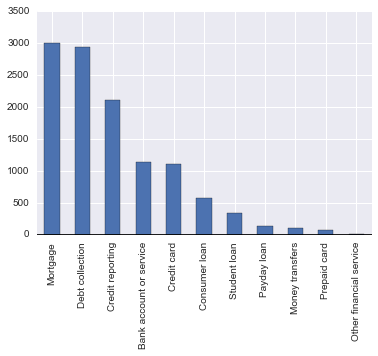

In [4]:
complaints['Product'].value_counts()

complaints['Product'].value_counts().plot(kind='bar'); plt.axhline(0, color='k')

#### Here is the top ten list of complaints logged by the company the complaint references
In keeping with the logic from the first list, this looks to be a list of banks and financial institutions, which are much more likely to deal directly in the debt issues that populate the top of the previous list

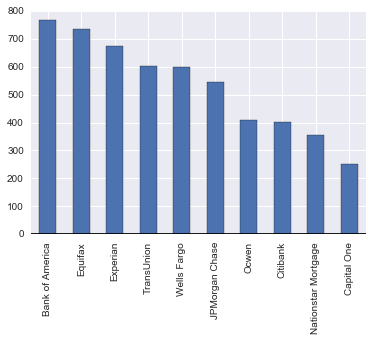

In [5]:
complaints['Company'].value_counts().head(10)

complaints['Company'].value_counts().head(10).plot(kind='bar'); plt.axhline(0, color='k')

#### Here is a count of the categories for each company's response action
This list of data doesn't provide too much information, except that the outcomes favored by the companies (closed with explanation and closed with non-monetary relief) happen much more frequently than outcomes that the companies would like to avoid (closed with monetary relief and untimely response)

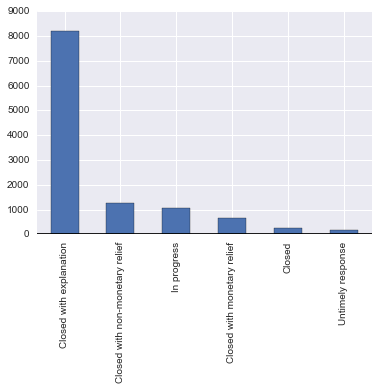

In [6]:
complaints['Company response'].value_counts()
complaints['Company response'].value_counts().plot(kind='bar'); plt.axhline(0, color='k')

#### Here is a list of the most common dates on which complaints were received

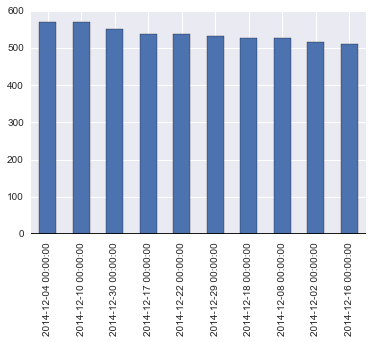

In [7]:
complaints["Date received"].value_counts()

complaints['Date received'].value_counts().head(10).plot(kind='bar'); plt.axhline(0, color='k')

#### Creating a variable to keep track of which day of the week a complaint was received

In [8]:
complaints['Weekday'] = complaints['Date received'].apply(lambda x: x.weekday())

#### This outputs the average number of complaints received on Mondays
The following set of outputs shows a clear trend towards complaints being filed early in the week (Monday and Tuesday have the highest values)

In [9]:
mondays = complaints[complaints['Weekday'] == 0].copy()
mondays.groupby('Date received').count().mean()[0]


508.80000000000001

#### This outputs the average number of complaints received on Tuesdays

In [10]:
tuesdays = complaints[complaints['Weekday'] == 1].copy()
tuesdays.groupby('Date received').count().mean()[0]

516.0

#### This outputs the average number of complaints received on Wednesdays

In [11]:
wednesdays = complaints[complaints['Weekday'] == 2].copy()
wednesdays.groupby('Date received').count().mean()[0]

457.80000000000001

#### This outputs the average number of complaints received on Thursdays

In [12]:
thursdays = complaints[complaints['Weekday'] == 3].copy()
thursdays.groupby('Date received').count().mean()[0]

408.5

#### This outputs the average number of complaints received on Fridays

In [13]:
fridays = complaints[complaints['Weekday'] == 4].copy()
fridays.groupby('Date received').count().mean()[0]

361.5

#### This outputs the average number of complaints received on Saturdays

In [14]:
saturdays = complaints[complaints['Weekday'] == 5].copy()
saturdays.groupby('Date received').count().mean()[0]

135.75

#### This outputs the average number of complaints received on Sundays

In [15]:
sundays = complaints[complaints['Weekday'] == 6].copy()
sundays.groupby('Date received').count().mean()[0]

126.75